In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/dl_dataset/Plant_Parameters.csv')  # Change to your dataset path


data.sample(10)


,pH,Soil EC,Phosphorus,Potassium,Urea,T.S.P,M.O.P,Moisture,Temperature,Plant Type
35431,6.542381,0.589017,29.069083,167.971933,63.575455,24.970654,28.201620,65.663365,52.049688,Corn
37958,6.797771,0.493716,35.977657,164.615891,63.201010,24.876785,28.256779,62.004077,67.254467,Corn
69397,6.284853,0.622698,14.522889,147.060987,34.752244,16.613690,24.676594,78.404681,62.377388,Strawberries
69136,6.431475,0.624880,12.042763,100.487636,35.414645,15.478514,24.693319,70.501476,72.674814,Strawberries
10734,6.392242,1.135423,29.648858,198.769670,93.643157,29.800268,23.268230,67.958849,83.827737,Chili
40087,6.286463,0.915005,28.947539,186.754106,74.550369,27.311219,27.312897,67.054893,74.175410,Eggplant
67016,6.327958,0.551111,14.307024,110.402576,34.028449,10.653870,24.256952,76.299201,72.080109,Strawberries
59599,5.694067,0.241152,30.387608,140.548118,54.276180,27.877156,32.329033,73.149294,79.458044,Rice
46107,6.298943,0.919328,20.981992,170.168909,96.196126,17.943231,27.265627,61.719334,81.604472,Eggplant
55545,6.020003,0.269451,33.913835,103.351216,54.772851,32.279783,32.101105,72.627343,75.691413,Rice


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   pH           100000 non-null  float64
 1   Soil EC      100000 non-null  float64
 2   Phosphorus   100000 non-null  float64
 3   Potassium    100000 non-null  float64
 4   Urea         100000 non-null  float64
 5   T.S.P        100000 non-null  float64
 6   M.O.P        100000 non-null  float64
 7   Moisture     100000 non-null  float64
 8   Temperature  100000 non-null  float64
 9   Plant Type   100000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 7.6+ MB


In [ ]:
data.describe()

,pH,Soil EC,Phosphorus,Potassium,Urea,T.S.P,M.O.P,Moisture,Temperature
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.311596,0.710449,23.479479,146.067966,52.474345,23.246805,30.003025,68.513908,72.532048
std,0.424663,0.421481,8.756160,47.294006,20.965486,7.766893,6.580982,7.826890,8.950912
min,5.500016,0.200001,5.000354,40.001335,20.000049,10.000095,20.000120,50.004516,50.000158
25%,6.033167,0.387673,16.500213,116.637448,34.623409,17.000481,24.525720,63.015585,67.195164
50%,6.287018,0.616172,23.453419,144.624399,50.953606,22.507231,29.099600,67.986050,74.090599
75%,6.566512,0.918653,29.948292,176.011526,68.084951,28.741791,35.033828,74.286058,79.687583
max,7.499994,2.399883,39.999834,299.977196,99.997990,39.999307,49.999221,89.999598,85.998926


In [ ]:

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 pH             0
Soil EC        0
Phosphorus     0
Potassium      0
Urea           0
T.S.P          0
M.O.P          0
Moisture       0
Temperature    0
Plant Type     0
dtype: int64


In [ ]:

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
print(data.dtypes)

pH             float64
Soil EC        float64
Phosphorus     float64
Potassium      float64
Urea           float64
T.S.P          float64
M.O.P          float64
Moisture       float64
Temperature    float64
Plant Type      object
dtype: object


In [ ]:
num_rows = len(data)
print(f"Number of rows: {num_rows}")


Number of rows: 100000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler


features = data[['pH',	'Soil EC',	'Phosphorus',	'Potassium','Urea',	'T.S.P',	'M.O.P'	,'Moisture',	'Temperature']].values
profiles = data[['pH',	'Soil EC',	'Phosphorus',	'Potassium','Urea',	'T.S.P',	'M.O.P'	,'Moisture',	'Temperature']].values

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
profiles_scaled = scaler.fit_transform(profiles)


X_conditions = np.array(features_scaled)
y_profiles = np.array(profiles_scaled)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_conditions, y_profiles, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Function to build the generator
def build_generator(input_dim, output_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=input_dim, kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(output_dim, activation='sigmoid'))  # Ensure y_profiles is between 0 and 1
    return model

# Function to build the discriminator
def build_discriminator(input_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, activation='relu', input_dim=input_dim))  # Reduced layer size
    model.add(layers.Dropout(0.3))  # Adding dropout for regularization
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu'))  # Reduced layer size

    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    return model

# Define the input and output dimensions based on your data
input_dim = X_conditions.shape[1]
output_dim = y_profiles.shape[1]

# Build the models
generator = build_generator(input_dim, output_dim)
discriminator = build_discriminator(output_dim)

# Set learning rates and optimizers
optimizer_g = tf.keras.optimizers.Adam(learning_rate=0.00005, clipvalue=1.0)  # Lowered learning rate for generator
optimizer_d = tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0)

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer_d, metrics=['accuracy'])

# Combined GAN model (freeze discriminator for GAN training)
discriminator.trainable = False
gan_input = layers.Input(shape=(input_dim,))
generated_profiles = generator(gan_input)
gan_output = discriminator(generated_profiles)

# Create the GAN model
gan_model = tf.keras.models.Model(gan_input, gan_output)
gan_model.compile(loss='binary_crossentropy', optimizer=optimizer_g)

# Print model summaries for verification
print("Generator Model Summary:")
generator.summary()
print("\nDiscriminator Model Summary:")
discriminator.summary()
print("\nCombined GAN Model Summary:")
gan_model.summary()

# Training parameters
epochs = 10000
batch_size = 32  # Reduced batch size to lower memory usage
d_steps_per_g_step = 2  # Train the discriminator twice for each generator step

# Early stopping parameters
patience = 5000  # Increased patience
best_loss = float('inf')
epochs_without_improvement = 0

# Training loop
for epoch in range(epochs):
    for _ in range(d_steps_per_g_step):  # Train the discriminator multiple times
        # Select a random batch of conditions
        idx = np.random.randint(0, X_conditions.shape[0], batch_size)
        conditions = X_conditions[idx]

        # Generate synthetic profiles
        generated_profiles = generator.predict(conditions)

        # Get a random set of real profiles
        idx_real = np.random.randint(0, y_profiles.shape[0], batch_size)
        real_profiles = y_profiles[idx_real]

        # Labels for real and generated profiles
        real_labels = np.ones((batch_size, 1)) * 0.9  # Label smoothing for real samples
        fake_labels = np.zeros((batch_size, 1))

        # Train the discriminator on real and fake profiles
        d_loss_real = discriminator.train_on_batch(real_profiles, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_profiles, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    g_loss = gan_model.train_on_batch(conditions, real_labels)

    # g_loss is already the loss value (a float)
    g_loss_value = g_loss
    if g_loss_value < best_loss:
        best_loss = g_loss_value
        epochs_without_improvement = 0  # Reset counter
    else:
        epochs_without_improvement += 1



    # Check if we need to stop
    if epochs_without_improvement >= patience:
        print(f"Stopping early at epoch {epoch}. Best loss: {best_loss:.4f}")
        break

    # Print the progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}:")
        print(f"  Discriminator Loss (Real + Fake): {d_loss[0]:.4f} | Discriminator Accuracy: {100 * d_loss[1]:.2f}%")
        print(f"  Generator Loss: {g_loss_value:.4f}\n")  # Format the loss value, not the list

    # Optional: save model checkpoints
    if epoch % 1000 == 0:
        generator.save(f'generator_epoch_{epoch}.h5')
        discriminator.save(f'discriminator_epoch_{epoch}.h5')

    # After your main training loop for each epoch, evaluate on the test set
    if epoch % 500 == 0:
      generated_test_profiles = generator.predict(X_test)
      test_loss = discriminator.evaluate(y_test, np.ones((y_test.shape[0], 1)) * 0.9, verbose=0)
      print(f"Epoch {epoch} - Test Loss: {test_loss}")




Generator Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 38153 (149.04 KB)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 0:
  Discriminator Loss (Real + Fake): 0.6962 | Discriminator Accuracy: 15.62%
  Generator Loss: 0.6940

625/625 [==============================] - 1s 1ms/step
Epoch 0 - Test Loss: [0.6740148663520813, 0.0]
1/1 [==============================] - 0s 26ms/step
Epoch 100:
  Discriminator Loss (Real + Fake): 0.4009 | Discriminator Accuracy: 50.00%
  Generator Loss: 0.5847

1/1 [==============================] - 0s 25ms/step
Epoch 200:
  Discriminator Loss (Real + Fake): 0.3063 | Discriminator Accuracy: 50.00%
  Generator Loss: 0.3967

1/1 [==============================] - 0s 26ms/step
Epoch 300:
  Discriminator Loss (Real + Fake): 0.2984 | Discriminator Accuracy: 50.00%
  Generator Loss: 0.4063

1/1 [==============================] - 0s 23ms/step
Epoch 400:
  Discriminator Loss (Real + Fake): 0.6036 | Discriminator Accuracy: 37.50%
  Generator Loss: 0.4609

1/1 [==============================] - 0s 23ms/step
Epoch 500:
  Discriminator Loss (Real + Fake): 0.7686 | Discriminator Accur

Epoch 1000:
  Discriminator Loss (Real + Fake): 0.6719 | Discriminator Accuracy: 35.94%
  Generator Loss: 0.8826

625/625 [==============================] - 1s 1ms/step
Epoch 1000 - Test Loss: [0.7286535501480103, 0.0]
1/1 [==============================] - 0s 23ms/step
Epoch 1100:
  Discriminator Loss (Real + Fake): 0.6726 | Discriminator Accuracy: 34.38%
  Generator Loss: 0.8753

1/1 [==============================] - 0s 23ms/step
Epoch 1200:
  Discriminator Loss (Real + Fake): 0.6677 | Discriminator Accuracy: 42.19%
  Generator Loss: 0.8023

1/1 [==============================] - 0s 23ms/step
Epoch 1300:
  Discriminator Loss (Real + Fake): 0.6677 | Discriminator Accuracy: 39.06%
  Generator Loss: 0.8366

1/1 [==============================] - 0s 23ms/step
Epoch 1400:
  Discriminator Loss (Real + Fake): 0.6830 | Discriminator Accuracy: 35.94%
  Generator Loss: 0.8217

1/1 [==============================] - 0s 24ms/step
Epoch 1500:
  Discriminator Loss (Real + Fake): 0.6710 | Discrimi

Epoch 2000:
  Discriminator Loss (Real + Fake): 0.6825 | Discriminator Accuracy: 37.50%
  Generator Loss: 0.8035

625/625 [==============================] - 1s 1ms/step
Epoch 2000 - Test Loss: [0.7474246621131897, 0.0]
1/1 [==============================] - 0s 25ms/step
Epoch 2100:
  Discriminator Loss (Real + Fake): 0.6849 | Discriminator Accuracy: 40.62%
  Generator Loss: 0.8106

1/1 [==============================] - 0s 23ms/step
Epoch 2200:
  Discriminator Loss (Real + Fake): 0.6702 | Discriminator Accuracy: 43.75%
  Generator Loss: 0.8207

1/1 [==============================] - 0s 22ms/step
Epoch 2300:
  Discriminator Loss (Real + Fake): 0.6669 | Discriminator Accuracy: 45.31%
  Generator Loss: 0.8384

1/1 [==============================] - 0s 21ms/step
Epoch 2400:
  Discriminator Loss (Real + Fake): 0.6517 | Discriminator Accuracy: 43.75%
  Generator Loss: 0.8940

1/1 [==============================] - 0s 27ms/step
Epoch 2500:
  Discriminator Loss (Real + Fake): 0.6690 | Discrimi

Epoch 3000:
  Discriminator Loss (Real + Fake): 0.6976 | Discriminator Accuracy: 45.31%
  Generator Loss: 0.8020

625/625 [==============================] - 1s 1ms/step
Epoch 3000 - Test Loss: [0.7543295621871948, 0.0]
1/1 [==============================] - 0s 25ms/step
Epoch 3100:
  Discriminator Loss (Real + Fake): 0.6772 | Discriminator Accuracy: 46.88%
  Generator Loss: 0.8280

1/1 [==============================] - 0s 24ms/step
Epoch 3200:
  Discriminator Loss (Real + Fake): 0.6938 | Discriminator Accuracy: 40.62%
  Generator Loss: 0.8147

1/1 [==============================] - 0s 25ms/step
Epoch 3300:
  Discriminator Loss (Real + Fake): 0.6854 | Discriminator Accuracy: 45.31%
  Generator Loss: 0.8016

1/1 [==============================] - 0s 24ms/step
Epoch 3400:
  Discriminator Loss (Real + Fake): 0.6824 | Discriminator Accuracy: 46.88%
  Generator Loss: 0.8201

1/1 [==============================] - 0s 26ms/step
Epoch 3500:
  Discriminator Loss (Real + Fake): 0.6904 | Discrimi

Epoch 4000:
  Discriminator Loss (Real + Fake): 0.7025 | Discriminator Accuracy: 46.88%
  Generator Loss: 0.7866

625/625 [==============================] - 1s 1ms/step
Epoch 4000 - Test Loss: [0.7668507695198059, 0.0]
1/1 [==============================] - 0s 26ms/step
Epoch 4100:
  Discriminator Loss (Real + Fake): 0.6949 | Discriminator Accuracy: 45.31%
  Generator Loss: 0.7980

1/1 [==============================] - 0s 23ms/step
Epoch 4200:
  Discriminator Loss (Real + Fake): 0.6857 | Discriminator Accuracy: 48.44%
  Generator Loss: 0.7690

1/1 [==============================] - 0s 24ms/step
Epoch 4300:
  Discriminator Loss (Real + Fake): 0.6794 | Discriminator Accuracy: 50.00%
  Generator Loss: 0.7957

1/1 [==============================] - 0s 23ms/step
Epoch 4400:
  Discriminator Loss (Real + Fake): 0.6838 | Discriminator Accuracy: 50.00%
  Generator Loss: 0.7923

1/1 [==============================] - 0s 24ms/step
Epoch 4500:
  Discriminator Loss (Real + Fake): 0.6853 | Discrimi

Epoch 5000:
  Discriminator Loss (Real + Fake): 0.6915 | Discriminator Accuracy: 45.31%
  Generator Loss: 0.7817

625/625 [==============================] - 1s 1ms/step
Epoch 5000 - Test Loss: [0.7634029984474182, 0.0]
1/1 [==============================] - 0s 27ms/step
Epoch 5100:
  Discriminator Loss (Real + Fake): 0.6839 | Discriminator Accuracy: 50.00%
  Generator Loss: 0.7927

1/1 [==============================] - 0s 27ms/step
Epoch 5200:
  Discriminator Loss (Real + Fake): 0.6957 | Discriminator Accuracy: 48.44%
  Generator Loss: 0.7836

1/1 [==============================] - 0s 24ms/step
Epoch 5300:
  Discriminator Loss (Real + Fake): 0.6939 | Discriminator Accuracy: 43.75%
  Generator Loss: 0.7986

1/1 [==============================] - 0s 24ms/step
Stopping early at epoch 5315. Best loss: 0.3700


In [ ]:
generated_test_profiles = generator.predict(X_test)

625/625 [==============================] - 1s 1ms/step


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



def generate_new_profiles(generator_model, num_profiles, input_dim, scaler):

    random_conditions = np.random.rand(num_profiles, input_dim)


    generated_profiles = generator_model.predict(random_conditions)


    generated_profiles_original_scale = scaler.inverse_transform(generated_profiles)


    column_names = ['pH', 'Soil EC', 'Phosphorus', 'Potassium', 'Urea', 'T.S.P', 'M.O.P', 'Moisture', 'Temperature']
    profiles_df = pd.DataFrame(generated_profiles_original_scale, columns=column_names)

    return profiles_df


num_profiles_to_generate = 10


new_profiles_df = generate_new_profiles(generator, num_profiles_to_generate, input_dim, scaler)


new_profiles_df


1/1 [==============================] - 0s 94ms/step


,pH,Soil EC,Phosphorus,Potassium,Urea,T.S.P,M.O.P,Moisture,Temperature
0,6.898227,0.315976,29.715614,71.923553,45.967434,26.256357,44.977409,88.947372,84.339478
1,7.202565,0.531923,21.255753,209.998306,49.838608,36.604012,39.419617,54.373962,65.243347
2,7.380509,0.703236,24.075640,85.813416,85.264519,28.976810,46.065643,83.235718,84.891533
3,5.575558,0.329151,8.816615,45.897243,25.849936,10.250222,28.526270,59.055168,73.920471
4,5.550080,0.523346,27.918758,274.065796,91.099594,38.080868,46.393147,57.012146,75.158661
5,6.068249,0.737428,36.119057,164.991867,89.804253,20.550697,39.134876,70.742851,79.737251
6,6.479685,0.333359,19.185162,91.962944,24.761652,10.479829,29.288109,68.059425,74.599136
7,6.530816,1.241989,38.794243,128.048477,23.031445,23.287579,42.341846,78.987602,84.181534
8,7.392148,0.358281,31.189854,269.529846,63.310043,39.791523,36.583366,63.184196,82.965233
9,6.916424,0.497392,26.878500,109.705582,28.023178,18.900930,27.745905,71.912994,74.065018


In [ ]:
!pip install numpy pandas tensorflow scikit-learn matplotlib joblib


In [ ]:
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/dl_dataset/Plant_Parameters.csv')

# Separate features and target
X = df.drop('Plant Type', axis=1)  # Replace 'Plant Type' with the name of your target column
y = df['Plant Type']

In [ ]:
# Encode the categorical target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Fit the scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:

# Define the deep learning model with improved architecture
model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dropout(0.3))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))  # More dropout
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for multi-class classification
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1280      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 11946 (46.66 KB)
Trainable params: 11946

In [ ]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping], verbose=1)

Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.2980 - accuracy: 0.5741 - val_loss: 0.4811 - val_accuracy: 0.8389
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5240 - accuracy: 0.7946 - val_loss: 0.3433 - val_accuracy: 0.8636
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4144 - accuracy: 0.8279 - val_loss: 0.3023 - val_accuracy: 0.8687
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3677 - accuracy: 0.8428 - val_loss: 0.2782 - val_accuracy: 0.8741
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3385 - accuracy: 0.8518 - val_loss: 0.2659 - val_accuracy: 0.8787
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3214 - accuracy: 0.8569 - val_loss: 0.2586 - val_accuracy: 0.8796
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3046 - accuracy: 0.8636 - val_loss: 0.2484 - val_ac

In [ ]:
 #Save the trained model
model.save('classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Print test accuracy
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

625/625 [==============================] - 1s 1ms/step - loss: 0.1714 - accuracy: 0.9047
Test Accuracy: 0.9047


In [ ]:
# Evaluate and print the classification report
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

625/625 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2005
           1       0.68      0.95      0.79      2013
           2       1.00      1.00      1.00      1977
           3       0.98      0.63      0.77      2038
           4       0.91      0.55      0.69      2002
           5       1.00      1.00      1.00      2000
           6       0.97      0.98      0.97      1985
           7       0.73      0.98      0.84      2002
           8       1.00      1.00      1.00      1992
           9       1.00      1.00      1.00      1986

    accuracy                           0.90     20000
   macro avg       0.92      0.91      0.90     20000
weighted avg       0.92      0.90      0.90     20000



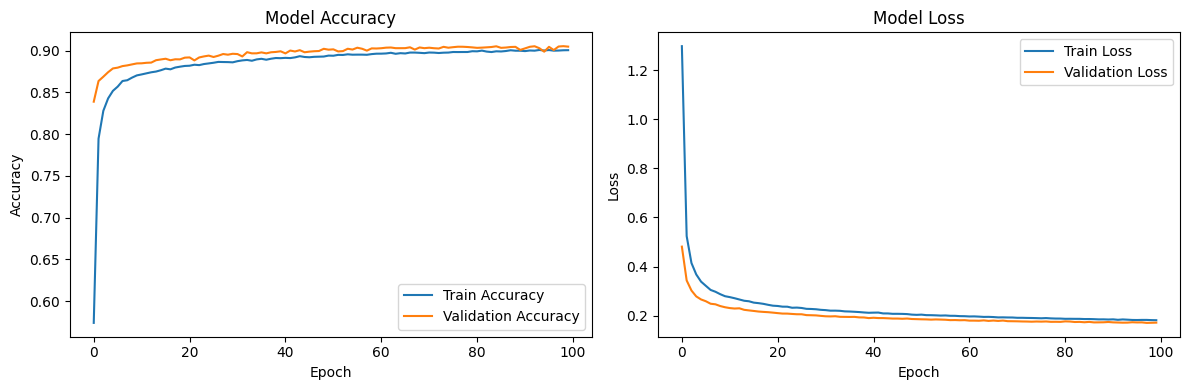

In [ ]:

# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()
